# In this part our analysis will be made based on the ratings of the movies

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data_rating = pd.read_csv('/Users/traulosspyros/Desktop/Big Blue Data Academy/spyros-travlos-exercises/P1-Movies/Data/IMDb movies_Cleaned.csv')

In [69]:
data_rating.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,0,0,0,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,0,0,0,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,0,0,0,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,0,0,0,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,0,0,0,NaN,31.0,14.0


In [70]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  int64  
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

## Let's find the top 10 movies with the best user rating i.e. user votes

In [71]:
data_users = data_rating.sort_values(by = 'avg_vote', ascending = False)

In [72]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 83275 to 76216
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  int64  
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15

### However we should only keep the movies where we have an adequate number of votes (i.e. more than 1000)

In [79]:
data_users['votes'].describe()

count    8.501000e+03
mean     8.605541e+04
std      1.498621e+05
min      1.000200e+04
25%      1.705500e+04
50%      3.415000e+04
75%      8.774000e+04
max      2.278845e+06
Name: votes, dtype: float64

In [80]:
data_users = data_users[data_users['votes']>1000]

In [81]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8501 entries, 38406 to 82091
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          8501 non-null   object 
 1   title                  8501 non-null   object 
 2   original_title         8501 non-null   object 
 3   year                   8501 non-null   int64  
 4   date_published         8501 non-null   object 
 5   genre                  8501 non-null   object 
 6   duration               8501 non-null   int64  
 7   country                8501 non-null   object 
 8   language               8497 non-null   object 
 9   director               8501 non-null   object 
 10  writer                 8496 non-null   object 
 11  production_company     8492 non-null   object 
 12  actors                 8500 non-null   object 
 13  description            8486 non-null   object 
 14  avg_vote               8501 non-null   float64
 15 

In [82]:
data_users.dropna(subset = ['votes'], inplace = True)

In [83]:
data_users.head(100)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
38406,tt0252487,Hababam Sinifi,Hababam Sinifi,1975,1975-04-01,"Comedy, Drama",87,Turkey,Turkish,Ertem Egilmez,...,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari...","Lazy, uneducated students share a very close b...",9.3,36269,0,0,0,NaN,62.0,1.0
28453,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,...,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845,25,28,28,80.0,8232.0,164.0
15528,tt0068646,Il padrino,The Godfather,1972,1972-09-21,"Crime, Drama",175,USA,"English, Italian, Latin",Francis Ford Coppola,...,"Marlon Brando, Al Pacino, James Caan, Richard ...",The aging patriarch of an organized crime dyna...,9.2,1572674,6,134,246,100.0,3977.0,253.0
77545,tt5354160,Aynabaji,Aynabaji,2016,2016-09-30,"Crime, Mystery, Thriller",147,Bangladesh,Bengali,Amitabh Reza Chowdhury,...,"Chanchal Chowdhury, Masuma Rahman Nabila, Bijo...",Ayna is an actor and the prison is his stage. ...,9.1,19876,35,0,0,NaN,114.0,7.0
16556,tt0071562,Il padrino - Parte II,The Godfather: Part II,1974,1975-09-25,"Crime, Drama",202,USA,"English, Italian, Spanish, Latin, Sicilian",Francis Ford Coppola,...,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",The early life and career of Vito Corleone in ...,9.0,1098714,13,47,48,90.0,1030.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52082,tt0986264,Stelle sulla Terra,Taare Zameen Par,2007,2007-12-21,"Drama, Family",165,India,Hindi,"Aamir Khan, Amole Gupte",...,"Darsheel Safary, Aamir Khan, Tisca Chopra, Vip...",An eight-year-old boy is thought to be a lazy ...,8.4,161867,0,1,21,NaN,400.0,34.0
76651,tt5074352,Dangal,Dangal,2016,2016-12-23,"Action, Biography, Drama",161,India,"Hindi, English",Nitesh Tiwari,...,"Aamir Khan, Fatima Sana Shaikh, Sanya Malhotra...",Former wrestler,8.4,147907,700,12,303,NaN,387.0,60.0
38416,tt0252591,Kapicilar Krali,Kapicilar Krali,1976,1977-05-01,"Comedy, Drama",84,Turkey,Turkish,Zeki Ökten,...,"Kemal Sunal, Sevda Ferdag, Sevil Üstekin, Bilg...","A janitor/doorman and his family who came to ""...",8.4,10831,0,0,0,NaN,1.0,1.0
18782,tt0078788,Apocalypse Now,Apocalypse Now,1979,1979-12-18,"Drama, Mystery, War",147,USA,"English, French, Vietnamese",Francis Ford Coppola,...,"Marlon Brando, Martin Sheen, Robert Duvall, Fr...",A U.S. Army officer serving in Vietnam is task...,8.4,591251,31,83,91,94.0,1205.0,305.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hababam Sinifi'),
  Text(1, 0, 'The Shawshank Redemption'),
  Text(2, 0, 'The Godfather'),
  Text(3, 0, 'Aynabaji'),
  Text(4, 0, 'The Godfather: Part II'),
  Text(5, 0, 'Peranbu'),
  Text(6, 0, 'Maratonci trce pocasni krug'),
  Text(7, 0, 'The Dark Knight'),
  Text(8, 0, 'Tosun Pasa'),
  Text(9, 0, 'Hababam Sinifi Sinifta Kaldi')])

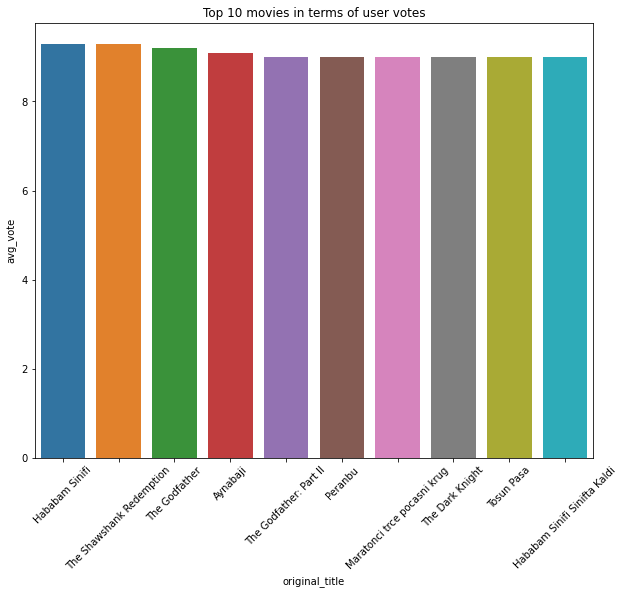

In [94]:
plt.figure(figsize=(10,8))
sns.barplot(x="original_title", y="avg_vote", data=data_users.head(10)).set_title('Top 10 movies in terms of user votes')
plt.xticks(rotation=45)

## Let's find the top 10 movies with the best critic rating i.e. metascore = 100

In [120]:
data_critics = data_rating.sort_values(by = 'metascore', ascending = False)

In [121]:
data_critics.describe()

,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,85855.000000,8.585500e+04,85855.000000,85855.000000,85855.000000,13305.000000,78258.000000,74058.000000
mean,1993.500891,100.351418,5.898656,9.493490e+03,29.141331,3.421641,8.211636,55.896881,46.040826,27.479989
std,24.216420,22.553848,1.234987,5.357436e+04,1456.806946,21.644081,55.265783,17.784874,178.511411,58.339158
min,1894.000000,41.000000,1.000000,9.900000e+01,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.050000e+02,0.000000,0.000000,0.000000,43.000000,4.000000,3.000000
50%,2003.000000,96.000000,6.100000,4.840000e+02,0.000000,0.000000,0.000000,57.000000,9.000000,8.000000
75%,2013.000000,108.000000,6.800000,1.766500e+03,0.000000,0.000000,0.000000,69.000000,27.000000,23.000000
max,2020.000000,808.000000,9.900000,2.278845e+06,350000.000000,936.000000,2797.000000,100.000000,10472.000000,999.000000


In [122]:
data_critics = data_critics[data_critics['metascore'] ==100.0]

In [123]:
data_critics.sort_values(by = 'reviews_from_critics', inplace = True)

In [124]:
data_critics['original_title']

7830          Viaggio in Italia
20382       Fanny och Alexander
28549     Trois couleurs: Rouge
12542       Au hasard Balthazar
11473             Il gattopardo
14407            Il conformista
9324     Sweet Smell of Success
5326                  Notorious
11147        Lawrence of Arabia
8098                Rear Window
3451           The Wizard of Oz
9792                    Vertigo
4126                 Casablanca
3816               Citizen Kane
15528             The Godfather
53332                   Boyhood
Name: original_title, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Viaggio in Italia'),
  Text(1, 0, 'Fanny och Alexander'),
  Text(2, 0, 'Trois couleurs: Rouge'),
  Text(3, 0, 'Au hasard Balthazar'),
  Text(4, 0, 'Il gattopardo'),
  Text(5, 0, 'Il conformista'),
  Text(6, 0, 'Sweet Smell of Success'),
  Text(7, 0, 'Notorious'),
  Text(8, 0, 'Lawrence of Arabia'),
  Text(9, 0, 'Rear Window'),
  Text(10, 0, 'The Wizard of Oz'),
  Text(11, 0, 'Vertigo'),
  Text(12, 0, 'Casablanca'),
  Text(13, 0, 'Citizen Kane'),
  Text(14, 0, 'The Godfather'),
  Text(15, 0, 'Boyhood')])

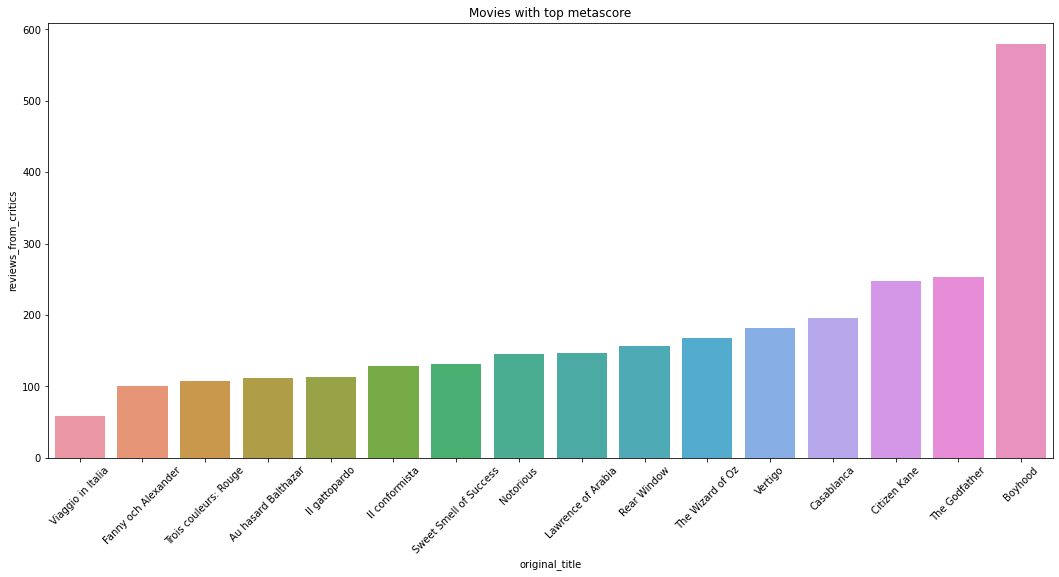

In [128]:
plt.figure(figsize=(18,8))
sns.barplot(x="original_title", y="reviews_from_critics", data=data_critics).set_title('Movies with top metascore')
plt.xticks(rotation=45)